<a href="https://colab.research.google.com/github/jmlDC/MediaBias-Thesis22-23/blob/Text-comparison/ScrapingNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Web Scraping

## Setting up Environment

### PIP install

In [1]:
!pip3 install requests-html
!apt update
!apt install chromium-chromedriver
!pip3 install selenium
!pip3 install webdriver-manager

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 1.2 MB/s 
     |████████████████████████████████| 112 kB 12.4 MB/s 
     |████████████████████████████████| 140 kB 21.3 MB/s 
     |████████████████████████████████| 127 kB 31.3 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=dd005f8dbc8488cd49b1f89518efb12a2725b68eb592d1502b7073381f0c89de
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=09a601de8eb878497fb411fd219e91c63e9064f68df340e30c1a59b0a5c7a974
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
Successfully built fake-useragent parse
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urll

In [2]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Needed for Selenium
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

cp: '/usr/lib/chromium-browser/chromedriver' and '/usr/bin/chromedriver' are the same file


### Imports

In [4]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [5]:
import urllib.request,sys,time
from bs4 import BeautifulSoup
import requests
import pandas as pd

from requests_html import HTMLSession 

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By


/usr/local/lib/python3.7/dist-packages/trio/_core/_multierror.py:411: RuntimeWarning: IPython detected, but you already have a custom exception handler installed. I'll skip installing Trio's custom handler, but this means exception groups will not show full tracebacks.
  category=RuntimeWarning,


In [6]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [7]:
# Ignore some warnings from being printed out
import warnings
warnings.filterwarnings('ignore')

### Mounting to GDrive

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### dir variable

In [9]:
dir  = "/content/gdrive/MyDrive/THESIS-MS/Truth-Thesis22-23/"

### Extract Source Function

In [10]:
def extract_source(url):
    agent = {"User-Agent":"Chrome/105.0.0.0"}
    try:
      source=requests.get(url, headers=agent)
    except Exception as e:                                   # this describes what to do if an exception is thrown
      error_type, error_obj, error_info = sys.exc_info()      # get the exception information
      print ('ERROR FOR LINK:',url)                          #print the link that cause the problem
      print (error_type, 'Line:', error_info.tb_lineno)     #print error info and line that threw the exception
    
    return source                                               #ignore this page. Abandon this and go back.

## Medias

#### Politifact

In [ ]:
## Politifact 
pagesToGet= 1
upperframe=[]  
site = "politifact"


for page in range(1,pagesToGet+1):
    print('processing page :', page)
    url = 'https://www.politifact.com/factchecks/list/?page='+str(page)
    print(url)
    
    #an exception might be thrown, so the code should be in a try-except block
    try:
        #use the browser to get the url. This is suspicious command that might blow up.
        page=requests.get(url)                             # this might throw an exception if something goes wrong.
    
    except Exception as e:                                   # this describes what to do if an exception is thrown
        error_type, error_obj, error_info = sys.exc_info()      # get the exception information
        print ('ERROR FOR LINK:',url)                          #print the link that cause the problem
        print (error_type, 'Line:', error_info.tb_lineno)     #print error info and line that threw the exception
        continue                                              #ignore this page. Abandon this and go back.

    time.sleep(2)   
    soup=BeautifulSoup(page.text,'html.parser')
    frame=[]
    links=soup.find_all('li',attrs={'class':'o-listicle__item'})
    print(len(links))

    
    filename= f"{dir + site}NEWS.csv"
    f=open(filename,"w", encoding = 'utf-8')
    headers="Statement,Link,Date, Source, Label\n"
    f.write(headers)
    
    for j in links:
        Statement = j.find("div",attrs={'class':'m-statement__quote'}).text.strip()
        Link = "https://www.politifact.com"
        Link += j.find("div",attrs={'class':'m-statement__quote'}).find('a')['href'].strip()
        Date = j.find('div',attrs={'class':'m-statement__body'}).find('footer').text[-14:-1].strip()
        Source = j.find('div', attrs={'class':'m-statement__meta'}).find('a').text.strip()
        Label = j.find('div', attrs ={'class':'m-statement__content'}).find('img',attrs={'class':'c-image__original'}).get('alt').strip()
        frame.append((Statement,Link,Date,Source,Label))
        f.write(Statement.replace(",","^")+","+Link+","+Date.replace(",","^")+","+Source.replace(",","^")+","+Label.replace(",","^")+"\n")
    upperframe.extend(frame)
f.close()
data=pd.DataFrame(upperframe, columns=['Statement','Link','Date','Source','Label'])
data.head()

processing page : 1
https://www.politifact.com/factchecks/list/?page=1
30


,Statement,Link,Date,Source,Label
0,"Under Kathy Hoffman, “student test scores plum...",https://www.politifact.com/factchecks/2022/sep...,"mber 19, 2022",Tom Horne,barely-true
1,Image shows a Rebekah Jones campaign event.,https://www.politifact.com/factchecks/2022/sep...,"mber 19, 2022",Matt Gaetz,barely-true
2,"Then-Vice President Mike Pence ""seized power"" ...",https://www.politifact.com/factchecks/2022/sep...,"mber 19, 2022",Mark Finchem,pants-fire
3,“The Simpsons” predicted Queen Elizabeth II’s ...,https://www.politifact.com/factchecks/2022/sep...,"mber 19, 2022",Viral image,pants-fire
4,"“Since 2019, I've successfully lobbied for the...",https://www.politifact.com/factchecks/2022/sep...,"mber 19, 2022",Kathy Hoffman,true


### Manila Bulletin

In [ ]:
## Manila bulletin
pagesToGet= 1
upperframe=[]  
topic = "ukraine war"
site = "manilaBulletin"

data=pd.DataFrame(columns=['Statement','Link','Date',"Topic"])


for page in range(1,pagesToGet+1):
    print('processing page :', page)
    url = 'https://mb.com.ph/page/'+str(page)+'/?s='+topic.replace(" ", "+")
    print(url)

    time.sleep(2)   
    soup=BeautifulSoup(extract_source(url).text, 'html.parser')

    links=soup.find("article", {'class' : 'content-bar col-12 col-lg-12 order-1 col-xl order-xl-2'}).find_all('li',attrs={'class':'article'})
    print(len(links))
    
    filename= f"{dir}{site}-{topic}-NEWS-List.csv"    
    for j in links:
        frame=[]
        try:
          Statement = j.find('h4').find('a').text
          Link = j.find('h4',attrs={'class':'title'}).find('a')['href'].strip()
          Date = j.find('time', {'class': 'time-ago'})['data-time'][0:10].strip()
          frame.extend((Statement, Link, Date, topic))
        except Exception as e:
            pass

        data = data.append(pd.Series(frame, index=data.columns[:len(frame)]), ignore_index=True)
data.to_csv(filename)
data.head()

processing page : 1
https://mb.com.ph/page/1/?s=ukraine+war
16


,Statement,Link,Date,Topic
0,Pope urges end to ‘senseless’ Ukraine war duri...,https://mb.com.ph/2022/09/14/pope-urges-end-to...,2022-09-14,ukraine war
1,Gatchalian seeks impact assessment of Russia-U...,https://mb.com.ph/2022/08/04/gatchalian-seeks-...,2022-08-04,ukraine war
2,"US sanctions Putin ‘girlfriend,’ more oligarch...",https://mb.com.ph/2022/08/03/us-sanctions-puti...,2022-08-03,ukraine war
3,Pacquiao-Yoo exhibition match to serve as char...,https://mb.com.ph/2022/07/20/pacquiao-yoo-exhi...,2022-07-20,ukraine war
4,Ukraine war to dominate G20 finance chief meet...,https://mb.com.ph/2022/07/15/ukraine-war-to-do...,2022-07-15,ukraine war


In [ ]:
data2 = pd.DataFrame(columns=["Title", "Author", "Date", "Text"])
filename= f"{dir+site+'-'+topic}NEWS.csv"

for index, row in data.iterrows():
  url = row["Link"] 
  print(url)

  time.sleep(1)   
  soup=BeautifulSoup(extract_source(url).text, 'html.parser')

  head=soup.find("article", {'id' : 'the-article-content'})
  # print(content.prettify())
  textList =soup.find("article", {'id' : 'the-article-content'}).find("section", {'class': 'article-content'}).find_all("p")
  
  
  row=[]
  try:
    Title = head.find('h2',{'class':'title'}).text.strip()
    Author = head.find('p',attrs={'class':'author'}).find('a').text[3:].strip()
    Date = head.find('p', attrs={'class': 'published'}).text[10:-9].strip(",") 
  except Exception as e:
      pass
  
  body = ""
  for t in textList:
    body += (t.text.replace('\u200b', '')) +"\n" 

  row.extend((Title, Author, Date, body))
  

  data2 = data2.append(pd.Series(row, index=data2.columns[:len(row)]), ignore_index=True)
  
data2.to_csv(filename)
data2.head()

https://mb.com.ph/2022/09/14/pope-urges-end-to-senseless-ukraine-war-during-kazakhstan-visit/
https://mb.com.ph/2022/08/04/gatchalian-seeks-impact-assessment-of-russia-ukraine-war-on-ph/
https://mb.com.ph/2022/08/03/us-sanctions-putin-girlfriend-more-oligarchs-for-complicity-in-ukraine-war/
https://mb.com.ph/2022/07/20/pacquiao-yoo-exhibition-match-to-serve-as-charity-event-for-ukraine-war-victims/
https://mb.com.ph/2022/07/15/ukraine-war-to-dominate-g20-finance-chief-meeting-in-indonesia/
https://mb.com.ph/2022/06/27/ukraine-war-could-boost-illegal-drug-production-un/
https://mb.com.ph/2022/06/09/un-chief-warns-impact-of-ukraine-war-on-world-is-worsening/
https://mb.com.ph/2022/06/07/church-leader-calls-for-prayers-for-an-end-to-the-russia-ukraine-war/
https://mb.com.ph/2022/05/30/ph-reiterates-call-to-end-russia-ukraine-war-in-asean-russia-forum/
https://mb.com.ph/2022/05/23/ukraine-war-pandemic-push-colour-who-international-meet/
https://mb.com.ph/2022/05/10/putin-says-russia-defend

,Title,Author,Date,Text
0,Pope urges end to ‘senseless’ Ukraine war duri...,Agence-France-Presse,"September 14, 2022","NUR SULTAN, Kazakhstan – Pope Francis on Tuesd..."
1,Gatchalian seeks impact assessment of Russia-U...,Joseph Pedrajas,"August 4, 2022",Senator Sherwin Gatchalian wants an assessment...
2,"US sanctions Putin ‘girlfriend,’ more oligarch...",Agence-France-Presse,"August 3, 2022","WASHINGTON, United States – The United States ..."
3,Pacquiao-Yoo exhibition match to serve as char...,Carlo Anolin,"July 20, 2022",The showdown between Manny Pacquiao and DK Yoo...
4,Ukraine war to dominate G20 finance chief meet...,Agence-France-Presse,"July 15, 2022","BALI, Indonesia – Group of 20 finance minister..."


### ABS CBN

In [ ]:
## ABS CBN
pagesToGet= 2
topic = "Queen Elizabeth Death"
site = "ABS-CBN_NEWS"


chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
userAgent = "Chrome/105.0.0.0"
chrome_options.add_argument(f"user-agent={userAgent}")
driver = webdriver.Chrome('chromedriver',options=chrome_options)

data=pd.DataFrame(columns=['Title','Link','Date',"Topic"])

for page in range(1,pagesToGet+1):
  url = 'https://news.abs-cbn.com/special-pages/search?q='+topic.replace(" ", "%20")+'&gsc.sort=&gsc.page='+str(page)+'#gsc.tab=0&gsc.q='+topic.replace(" ", "%20")+'&gsc.sort=&gsc.page='+str(page)
  print(url)

  driver.get(url)
  # WebDriverWait(driver, 30).until(EC.visibility_of_element_located((By.ID, '___gcse_0'))) 
  source = driver.page_source

  time.sleep(2)   
  soup = BeautifulSoup(source, 'html.parser')
  searches = soup.find_all('div', {'class':'gsc-webResult gsc-result'})
  filename= f"{dir}{site}-{topic}-NEWS-List.csv"     

  for x in searches:
    frame=[]
    Title = x.find('div', class_="gs-title").find("a").text.strip()
    Date = x.find('div', class_="gs-bidi-start-align gs-snippet").text[:12].strip()
    Link = x.find('a', class_="gs-title")['href']
    frame.extend((Title, Link, Date, topic))

    data = data.append(pd.Series(frame, index=data.columns[:len(frame)]), ignore_index=True)



data.to_csv(filename)
driver.quit()
data





https://news.abs-cbn.com/special-pages/search?q=Queen%20Elizabeth%20Death&gsc.sort=&gsc.page=1#gsc.tab=0&gsc.q=Queen%20Elizabeth%20Death&gsc.sort=&gsc.page=1
https://news.abs-cbn.com/special-pages/search?q=Queen%20Elizabeth%20Death&gsc.sort=&gsc.page=2#gsc.tab=0&gsc.q=Queen%20Elizabeth%20Death&gsc.sort=&gsc.page=2


,Title,Link,Date,Topic
0,Queen Elizabeth II begins solemn final journey...,https://news.abs-cbn.com/overseas/09/11/22/que...,"Sep 11, 2022",Queen Elizabeth Death
1,Queen Elizabeth II dies at 96 | ABS-CBN News,https://news.abs-cbn.com/overseas/09/09/22/que...,"Sep 9, 2022",Queen Elizabeth Death
2,London Bridge: The protocol after Queen Elizab...,https://news.abs-cbn.com/overseas/09/09/22/lon...,"Sep 9, 2022",Queen Elizabeth Death
3,The death of Queen Elizabeth II: Thursday's ti...,https://news.abs-cbn.com/overseas/09/09/22/the...,"Sep 9, 2022",Queen Elizabeth Death
4,Netflix suspends 'The Crown' filming after que...,https://news.abs-cbn.com/entertainment/09/10/2...,"Sep 10, 2022",Queen Elizabeth Death
5,Death of Queen Elizabeth II: What happens next...,https://news.abs-cbn.com/spotlight/09/15/22/de...,5 days ago .,Queen Elizabeth Death
6,Queen Elizabeth II: Record-breaking monarch | ...,https://news.abs-cbn.com/spotlight/09/09/22/qu...,"Sep 9, 2022",Queen Elizabeth Death
7,Operation Unicorn: The plan for Queen's death ...,https://news.abs-cbn.com/overseas/09/09/22/ope...,"Sep 9, 2022",Queen Elizabeth Death
8,Prince Philip's death has left 'huge void' for...,https://news.abs-cbn.com/overseas/04/11/21/pri...,"Apr 11, 2021",Queen Elizabeth Death
9,Sporting world pays tribute to Queen Elizabeth...,https://news.abs-cbn.com/sports/09/09/22/sport...,"Sep 9, 2022",Queen Elizabeth Death


In [ ]:
data2 = pd.DataFrame(columns=["Title", "Author", "Date", "Text"])
filename= f"{dir+site+'-'+topic}NEWS.csv"

for index, row in data.iterrows():
  url = row["Link"] 
  if ('multimedia/photo' in url):
    pass
  else:
    print(url)

    time.sleep(1)   
    soup=BeautifulSoup(extract_source(url).text, 'html.parser')
      
    row=[]
    
    Title = soup.find('h1',{'class':'news-title'}).text.strip()
    Author = soup.find('span',attrs={'class':'editor'}).text.strip()
    Date = soup.find('span', attrs={'class': 'date-posted'}).text[:-8].strip() 
    
    textList =soup.find("div", {'class' :'article-content'}).find_all("p")
    body = ""
    for t in textList:
      if (t.text != "RELATED VIDEO:"):
        body += (t.text) +"\n" 

    row.extend((Title, Author, Date, body))
    

    data2 = data2.append(pd.Series(row, index=data2.columns[:len(row)]), ignore_index=True)
  
data2.to_csv(filename)
data2.head()

https://news.abs-cbn.com/overseas/09/11/22/queen-elizabeth-ii-begins-solemn-final-journey
https://news.abs-cbn.com/overseas/09/09/22/queen-elizabeth-ii-dies-at-96
https://news.abs-cbn.com/overseas/09/09/22/london-bridge-the-protocol-after-queen-elizabeths-death
https://news.abs-cbn.com/overseas/09/09/22/the-death-of-queen-elizabeth-ii-thursdays-timeline
https://news.abs-cbn.com/entertainment/09/10/22/netflix-suspends-the-crown-filming-after-queens-death
https://news.abs-cbn.com/spotlight/09/15/22/death-of-queen-elizabeth-ii-what-happens-next
https://news.abs-cbn.com/spotlight/09/09/22/queen-elizabeth-ii-record-breaking-monarch
https://news.abs-cbn.com/overseas/09/09/22/operation-unicorn-the-plan-for-queens-death-in-scotland
https://news.abs-cbn.com/overseas/04/11/21/prince-philips-death-has-left-huge-void-for-queen-elizabeth-ii-says-son-andrew
https://news.abs-cbn.com/sports/09/09/22/sporting-world-pays-tribute-to-queen-elizabeth-ii


,Title,Author,Date,Text
0,Queen Elizabeth II begins solemn final journey...,"Callum Paton and Danny Kemp, Agence France-Presse",Sep 11 2022,LONDON (UPDATE) — Queen Elizabeth II embarks o...
1,"Queen Elizabeth II dies, Charles III succeeds","Stuart Graham with Phil Hazlewood in London, A...",Sep 09 2022,"Queen Elizabeth II, the longest-serving monarc..."
2,Operation London Bridge: What happens after th...,Deutsche Welle,Sep 09 2022,"The day has come, setting into motion a minute..."
3,The death of Queen Elizabeth II: Thursday's ti...,"Helen Rowe, Agence France-Presse",Sep 09 2022,LONDON (UPDATE) - A rare palace announcement a...
4,Netflix suspends 'The Crown' filming after dea...,Agence France-Presse,Sep 10 2022,Netflix suspended filming of its British royal...


### GMA 

In [ ]:
# https://www.gmanetwork.com/news/#/search;query=queen%20elizabeth%20death;sortBy=_score;isDesc=1

topic = "Queen Elizabeth Death"
site = "GMA-Network"


chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--disable-blink-features=AutomationControlled')
userAgent = "Chrome/105.0.0.0"
chrome_options.add_argument(f"user-agent={userAgent}")
driver = webdriver.Chrome('chromedriver',options=chrome_options)

data=pd.DataFrame(columns=['Title','Link','Date',"Topic"])

url = 'https://www.gmanetwork.com/news/#/search;query='+topic.replace(" ", "%20")+';sortBy=_score;isDesc=1'
print(url)

driver.get(url)
WebDriverWait(driver, 50).until(EC.visibility_of_element_located((By.CLASS_NAME, 'clearfix'))) 
source = driver.page_source

time.sleep(2)   
soup = BeautifulSoup(source, 'html.parser')
searches = soup.find_all('div', {'class':'zd-row-text-wrap'})
filename= f"{dir}{site}-{topic}-NEWS-List.csv"     
print(len(searches))

for x in searches:
  frame=[]
  Title = x.find('h4', class_="zd-result-title ng-star-inserted").text.strip()
  Date = x.find('div', class_="zd-result-subTitle ng-star-inserted").text[:-18].strip()
  partialTitle = ' '.join(Title.split()[:8])

  try:
    Link = ""
    to_Click = driver.find_element(By.XPATH, f"//*[contains(text(), '{Title}')]")
    print(to_Click.text)
    to_Click.click()
    driver.switch_to.window(driver.window_handles[1])
    Link = driver.current_url
    driver.close()
    driver.switch_to.window(driver.window_handles[0])
  except Exception as e:
    print("Something wrong. Error:", e.split()[0])

  frame.extend((Title, Link, Date, topic))

  data = data.append(pd.Series(frame, index=data.columns[:len(frame)]), ignore_index=True)

data.to_csv(filename)
driver.quit()
data.head(10)


https://www.gmanetwork.com/news/#/search;query=Queen%20Elizabeth%20Death;sortBy=_score;isDesc=1
22
Death of Queen Elizabeth II: What happens next?
Senate adopts resolution expressing condolences over death of Queen Elizabeth II
Something wrong. Error: Message: invalid selector: Unable to locate an element with the xpath expression //*[contains(text(), 'Netflix series 'The Crown' briefly pauses production after Queen Elizabeth's death')] because of the following error:
SyntaxError: Failed to execute 'evaluate' on 'Document': The string '//*[contains(text(), 'Netflix series 'The Crown' briefly pauses production after Queen Elizabeth's death')]' is not a valid XPath expression.
  (Session info: headless chrome=105.0.5195.102)
Stacktrace:
#0 0x55fd5f50b1a3 <unknown>
#1 0x55fd5f2d7ac3 <unknown>
#2 0x55fd5f2dac89 <unknown>
#3 0x55fd5f2daa97 <unknown>
#4 0x55fd5f2dad37 <unknown>
#5 0x55fd5f30f532 <unknown>
#6 0x55fd5f30fa41 <unknown>
#7 0x55fd5f3436e7 <unknown>
#8 0x55fd5f32d10d <unknown>
#9 

,Title,Link,Date,Topic
0,Death of Queen Elizabeth II: What happens next?,https://www.gmanetwork.com/news/topstories/wor...,"September 11, 2022",Queen Elizabeth Death
1,Senate adopts resolution expressing condolence...,https://www.gmanetwork.com/news/topstories/nat...,"September 12, 2022",Queen Elizabeth Death
2,Netflix series 'The Crown' briefly pauses prod...,,"September 10, 2022",Queen Elizabeth Death
3,Senate hands UK envoy reso expressing condolen...,,"September 19, 2022",Queen Elizabeth Death
4,Marcos mourns Queen Elizabeth's death: She exe...,,"September 09, 2022",Queen Elizabeth Death
5,Prince Harry and Meghan tread delicate path af...,,"September 10, 2022",Queen Elizabeth Death
6,Death of Queen Elizabeth II: What happens next?,https://www.gmanetwork.com/news/topstories/wor...,"September 11, 2022",Queen Elizabeth Death
7,Senate adopts resolution expressing condolence...,https://www.gmanetwork.com/news/topstories/nat...,"September 12, 2022",Queen Elizabeth Death
8,Netflix series 'The Crown' briefly pauses prod...,,"September 10, 2022",Queen Elizabeth Death
9,Senate hands UK envoy reso expressing condolen...,,"September 19, 2022",Queen Elizabeth Death


In [ ]:
data

,Title,Link,Date,Topic
0,Death of Queen Elizabeth II: What happens next?,https://www.gmanetwork.com/news/topstories/wor...,"September 11, 2022",Queen Elizabeth Death
1,Senate adopts resolution expressing condolence...,https://www.gmanetwork.com/news/topstories/nat...,"September 12, 2022",Queen Elizabeth Death
2,Netflix series 'The Crown' briefly pauses prod...,,"September 10, 2022",Queen Elizabeth Death
3,Senate hands UK envoy reso expressing condolen...,,"September 19, 2022",Queen Elizabeth Death
4,Marcos mourns Queen Elizabeth's death: She exe...,,"September 09, 2022",Queen Elizabeth Death
5,Prince Harry and Meghan tread delicate path af...,,"September 10, 2022",Queen Elizabeth Death
6,Death of Queen Elizabeth II: What happens next?,https://www.gmanetwork.com/news/topstories/wor...,"September 11, 2022",Queen Elizabeth Death
7,Senate adopts resolution expressing condolence...,https://www.gmanetwork.com/news/topstories/nat...,"September 12, 2022",Queen Elizabeth Death
8,Netflix series 'The Crown' briefly pauses prod...,,"September 10, 2022",Queen Elizabeth Death
9,Senate hands UK envoy reso expressing condolen...,,"September 19, 2022",Queen Elizabeth Death


In [ ]:
data2 = pd.DataFrame(columns=["Title", "Author", "Date", "Text"])
filename= f"{dir+site+'-'+topic}NEWS.csv"

for index, row in data.iterrows():
  url = row["Link"] 
  if (url == ""):
    continue
  
  print(url)
  time.sleep(2)   
  soup=BeautifulSoup(extract_source(url).text, 'html.parser')
    
  row=[]
  
  Title = soup.find('h1',{'class':'story_links'}).text.strip()
  Author = soup.find('div',attrs={'class':'main-byline'}).find('div').find('div').text.strip()
  Date = soup.find('div', attrs={'class': 'article-time'}).find('time')['datetime'][:10].strip() 
  
  textList =soup.find("div", {'class' :'story_main'}).find_all("p")
  body = ""
  for t in textList:
    if (t.find('p', class_="ad")):
      pass
    else:
      body += (t.text) +"\n" 

  row.extend((Title, Author, Date, body))
  

  data2 = data2.append(pd.Series(row, index=data2.columns[:len(row)]), ignore_index=True)
  
data2.to_csv(filename)
data2.head()

https://www.gmanetwork.com/news/topstories/world/844487/death-of-queen-elizabeth-ii-what-happens-next/story/
https://www.gmanetwork.com/news/topstories/nation/844609/senate-adopts-resolution-expressing-condolences-over-death-of-queen-elizabeth-ii/story/
https://www.gmanetwork.com/news/topstories/world/844487/death-of-queen-elizabeth-ii-what-happens-next/story/
https://www.gmanetwork.com/news/topstories/nation/844609/senate-adopts-resolution-expressing-condolences-over-death-of-queen-elizabeth-ii/story/
https://www.gmanetwork.com/news/topstories/world/845333/queen-elizabeth-ii-s-coffin-makes-way-to-abbey/story/
https://www.gmanetwork.com/news/topstories/world/845318/crowds-jam-london-for-queen-elizabeth-ii-s-funeral/story/
https://www.gmanetwork.com/news/lifestyle/artandculture/845335/watch-queen-elizabeth-ii-s-state-funeral-in-london/story/
https://www.gmanetwork.com/news/topstories/world/845296/britain-and-the-world-prepare-to-say-last-farewell-to-queen-elizabeth/story/
https://www.gm

,Title,Author,Date,Text
0,Death of Queen Elizabeth II: What happens next?,"By ALICE RITCHIE, Agence France-Presse",2022-09-11,LONDON - A procession of the coffin through S...
1,Senate adopts resolution expressing condolence...,"By MEL MATTHEW DOCTOR, GMA News",2022-09-12,The Senate on Monday adopted a resolution exp...
2,Death of Queen Elizabeth II: What happens next?,"By ALICE RITCHIE, Agence France-Presse",2022-09-11,LONDON - A procession of the coffin through S...
3,Senate adopts resolution expressing condolence...,"By MEL MATTHEW DOCTOR, GMA News",2022-09-12,The Senate on Monday adopted a resolution exp...
4,The funeral of Queen Elizabeth II,"By MICHAEL HOLDEN, KATE HOLTON and ANDREW MACA...",2022-09-19,"LONDON — King Charles III, his sons William a..."


# EDA

### Function for Representation

#### Imports

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords

In [12]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('vader_lexicon')
stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
# Import other necessary packages
import pickle
from wordcloud import WordCloud

In [14]:
# Set up visualization configurations
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
sns.set(rc={'figure.figsize':(12,6)})

#### Function

In [15]:
def create_wordcloud(df, col, max_words=100, title=None):    
    # Transform text for WordCloud
    df = df[col]
    df = df.dropna()
    df = ' '.join(df)
    df = df.replace(' ', ',')
    
    # Generate wordcloud image
    wc = WordCloud(
        background_color="white", 
        # colormap='plasma',
        max_words=max_words
    )
    wc.generate(df)
    plt.imshow(wc, interpolation='bilinear')
    if title:
        plt.title(title, size=30)
    plt.axis("off")
    plt.show()
    plt.close()

def text_to_dtm(df):
    vectorizer = CountVectorizer(
        stop_words=stopwords,
        max_features=2000
    )
    dtm = vectorizer.fit_transform(df)
    return dtm, vectorizer

def text_to_ngram(df, n=2):
    vectorizer = CountVectorizer(
        stop_words=stopwords,
        ngram_range=(n, n),
        token_pattern=r'\b\w+\b',
        min_df=1,
        max_features=2000
    )
    ngram = vectorizer.fit_transform(df)
    return ngram, vectorizer

def text_to_tfidf(df, stopwords=stopwords):
    vectorizer = TfidfVectorizer(
        stop_words=stopwords,
        max_features=2000
    )
    tfidf = vectorizer.fit_transform(df)
    pickle.dump(vectorizer, open('tfidf.pk', 'wb'))
    return tfidf, vectorizer


def visualize_frequency(vectors, vectorizer, title=None, rotation=45):
    total = vectors.sum(axis=0)
    frequency = [(w, total[0, i]) for w, i in vectorizer.vocabulary_.items()]
    frequency = pd.DataFrame(frequency, columns=['term', 'frequency'])
    frequency = frequency.sort_values(by='frequency', ascending=False).reset_index(drop=True)
    ax = sns.barplot(data=frequency.head(30), x='frequency', y='term')
    if title:
        ax.set_title(title)
    plt.xticks(rotation=rotation)
    plt.show()
    plt.close()

def visualize(df, col, title=""):
    dtm, dtm_v = text_to_dtm(df[col])
    bigram, bigram_v = text_to_ngram(df[col], n=2)
    trigram, trigram_v = text_to_ngram(df[col], n=3)
    tfidf, tfidf_v = text_to_tfidf(df[col])

    create_wordcloud(df, col, title='{}'.format(title))
    # visualize_frequency(dtm, dtm_v, title='Term frequency for {}'.format(title), rotation=0)
    # visualize_frequency(bigram, bigram_v, title='Term frequency for {} - Bigram'.format(title), rotation=0)
    # visualize_frequency(trigram, trigram_v, title='Term frequency for {} - Trigram'.format(title), rotation=0)
    visualize_frequency(tfidf, tfidf_v, title='TFIDF for {}'.format(title), rotation=0)
    
   

### Visualization

In [ ]:
ABS_df =  pd.read_csv(f'{dir}ABS-CBN_NEWS-Queen Elizabeth DeathNEWS.csv', index_col=0, header=0)
ABS_df.head()

,Title,Author,Date,Text
0,Queen Elizabeth II begins solemn final journey...,"Callum Paton and Danny Kemp, Agence France-Presse",Sep 11 2022,LONDON (UPDATE) — Queen Elizabeth II embarks o...
1,"Queen Elizabeth II dies, Charles III succeeds","Stuart Graham with Phil Hazlewood in London, A...",Sep 09 2022,"Queen Elizabeth II, the longest-serving monarc..."
2,Operation London Bridge: What happens after th...,Deutsche Welle,Sep 09 2022,"The day has come, setting into motion a minute..."
3,The death of Queen Elizabeth II: Thursday's ti...,"Helen Rowe, Agence France-Presse",Sep 09 2022,LONDON (UPDATE) - A rare palace announcement a...
4,Netflix suspends 'The Crown' filming after dea...,Agence France-Presse,Sep 10 2022,Netflix suspended filming of its British royal...


In [ ]:
ABS_rslt_df = ABS_df[ABS_df['Date'] == "Sep 11 2022"]
ABS_rslt_df.head()

,Title,Author,Date,Text
0,Queen Elizabeth II begins solemn final journey...,"Callum Paton and Danny Kemp, Agence France-Presse",Sep 11 2022,LONDON (UPDATE) — Queen Elizabeth II embarks o...


In [ ]:
GMA_df = pd.read_csv(f"{dir}GMA-Network-Queen Elizabeth DeathNEWS.csv", index_col=0, header=0)
GMA_df.head()

,Title,Author,Date,Text
0,Death of Queen Elizabeth II: What happens next?,"By ALICE RITCHIE, Agence France-Presse",2022-09-11,LONDON - A procession of the coffin through S...
1,Senate adopts resolution expressing condolence...,"By MEL MATTHEW DOCTOR, GMA News",2022-09-12,The Senate on Monday adopted a resolution exp...
2,Death of Queen Elizabeth II: What happens next?,"By ALICE RITCHIE, Agence France-Presse",2022-09-11,LONDON - A procession of the coffin through S...
3,Senate adopts resolution expressing condolence...,"By MEL MATTHEW DOCTOR, GMA News",2022-09-12,The Senate on Monday adopted a resolution exp...
4,The funeral of Queen Elizabeth II,"By MICHAEL HOLDEN, KATE HOLTON and ANDREW MACA...",2022-09-19,"LONDON — King Charles III, his sons William a..."


In [ ]:
GMA_rslt_df = GMA_df[GMA_df['Date'] == "2022-09-11"]
GMA_rslt_df.head()

,Title,Author,Date,Text
0,Death of Queen Elizabeth II: What happens next?,"By ALICE RITCHIE, Agence France-Presse",2022-09-11,LONDON - A procession of the coffin through S...
2,Death of Queen Elizabeth II: What happens next?,"By ALICE RITCHIE, Agence France-Presse",2022-09-11,LONDON - A procession of the coffin through S...


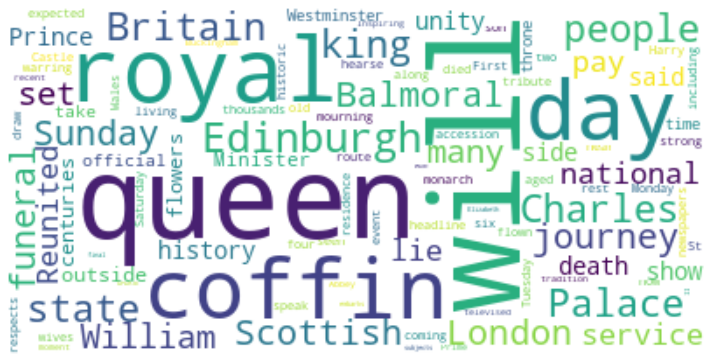

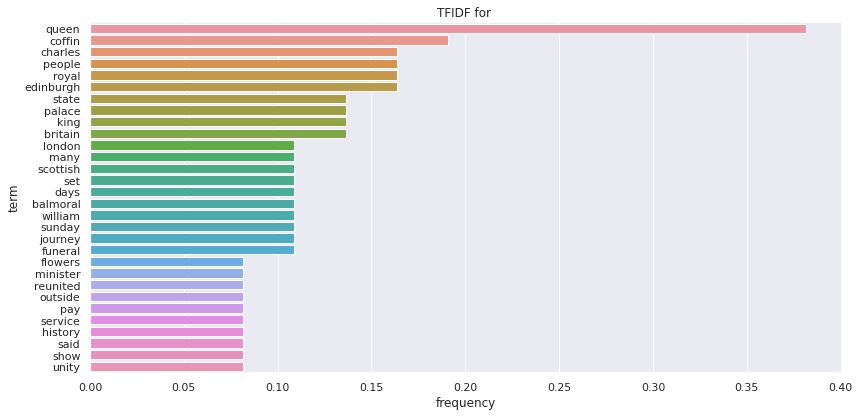

In [ ]:
visualize(ABS_rslt_df, "Text")

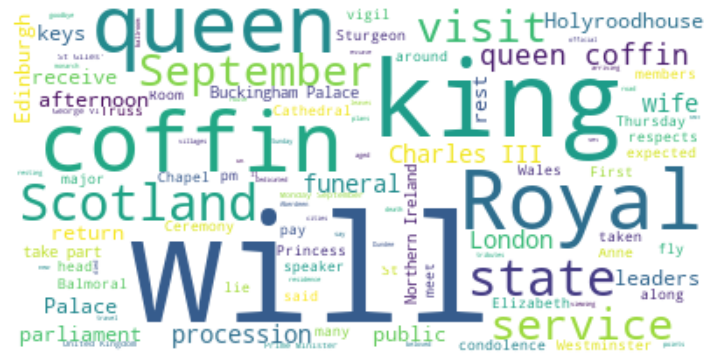

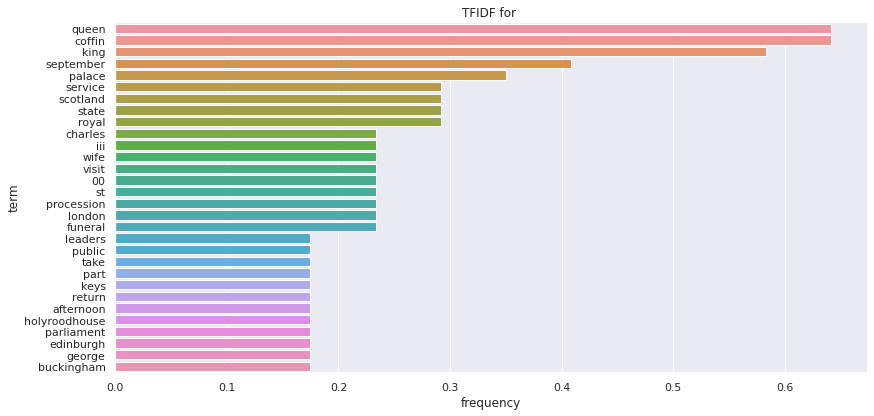

In [ ]:
visualize(GMA_rslt_df, "Text")

# Text Comparison

## Function

In [16]:
def abs_scrape(url):
  abs_df = pd.DataFrame(columns=["Title", "Author", "Date", "Text"])

  time.sleep(1)   
  soup=BeautifulSoup(extract_source(url).text, 'html.parser')
    
  row=[]
  
  Title = soup.find('h1',{'class':'news-title'}).text.strip()
  Author = soup.find('span',attrs={'class':'editor'}).text.strip()
  Date = soup.find('span', attrs={'class': 'date-posted'}).text[:-8].strip() 
  
  textList =soup.find("div", {'class' :'article-content'}).find_all("p")
  body = ""
  for t in textList:
    if (t.text != "RELATED VIDEO:"):
      body += (t.text) +"\n" 

  row.extend((Title, Author, Date, body))
  
  abs_df = abs_df.append(pd.Series(row, index=abs_df.columns[:len(row)]), ignore_index=True)
  
  return abs_df

In [17]:
def gma_scrape(url):
  gma_df = pd.DataFrame(columns=["Title", "Author", "Date", "Text"])
  
  time.sleep(2)   
  soup=BeautifulSoup(extract_source(url).text, 'html.parser')
    
  row=[]
  
  Title = soup.find('h1',{'class':'story_links'}).text.strip()
  Author = soup.find('div',attrs={'class':'main-byline'}).find('div').find('div').text.strip()
  Date = soup.find('div', attrs={'class': 'article-time'}).find('time')['datetime'][:10].strip() 
  
  textList =soup.find("div", {'class' :'story_main'}).find_all("p")
  body = ""
  for t in textList:
    if (t.find('p', class_="ad")):
      pass
    else:
      body += (t.text) +"\n" 

  row.extend((Title, Author, Date, body))
  

  gma_df = gma_df.append(pd.Series(row, index=gma_df.columns[:len(row)]), ignore_index=True)

  return gma_df
  


In [46]:
def cnn_scrape(url):

  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  chrome_options.add_argument('--disable-blink-features=AutomationControlled')
  userAgent = "Chrome/105.0.0.0"
  chrome_options.add_argument(f"user-agent={userAgent}")
  driver = webdriver.Chrome('chromedriver',options=chrome_options)

  driver.get(url)
  WebDriverWait(driver, 50).until(EC.visibility_of_element_located((By.CLASS_NAME, 'title'))) 
  source = driver.page_source

  cnn_df = pd.DataFrame(columns=["Title", "Author", "Date", "Text"])
  
  soup=BeautifulSoup(source, 'html.parser')
  # time.sleep(2)   

  # print(soup)
  row=[]
  
  Title = soup.find('h1',{'class':'title'}).text.strip()
  Author = soup.find('div',attrs={'class':'author-byline'}).find('p').find('a').text.strip()
  Date = soup.find('div', attrs={'class': 'dateLine'}).find('p', {'class': 'dateString no-icon'}).text[10:-11].strip() 
  
  textList =soup.find("div", {'class' :'article-maincontent-p cnn-life-body'}).find_all("p")
  body = ""
  for t in textList:
      body += (t.text) +"\n" 

  row.extend((Title, Author, Date, body))
  

  cnn_df = cnn_df.append(pd.Series(row, index=cnn_df.columns[:len(row)]), ignore_index=True)

  return cnn_df

In [48]:
def clean(df, text, clean_col ):
    """
    Remove blank texts, replaces text with lower case characters,
    remove special characters, remove other special texts like URLs and Twitter handles, 
    remove leading and trailing whitespaces, and remove stopwords.
    """

    # Remove blank texts
    df[clean_col] = df[text].fillna('')     

    # Transform into lowercase
    df[clean_col] = df[clean_col].str.lower()

    # # Remove non-alphanumeric characters
    df[clean_col] = df[clean_col].str.replace(r'(@[A-Za-z0-9_]+)|([^A-Za-z0-9_ \t])|(\w+:\/\/\S+)', '')
    
    # # Lemmatize verbs
    # df['cleaned_text'] = df['cleaned_text'].apply(lambda row: ' '.join([lemmatizer.lemmatize(x, 'v') for x in row.split()]))

    # # Lemmatize adjectives
    # df['cleaned_text'] = df['cleaned_text'].apply(lambda row: ' '.join([lemmatizer.lemmatize(x, 'a') for x in row.split()]))

    # # Lemmatize nouns
    # df['cleaned_text'] = df['cleaned_text'].apply(lambda row: ' '.join([lemmatizer.lemmatize(x, 'n') for x in row.split()]))

    # Remove trailing and leading whitespaces
    df[clean_col] = df[clean_col].str.replace(r'^\s+|\s+$', '')

    # # Remove stopwords 
    df[clean_col] = df[clean_col].apply(lambda row: ' '.join([word for word in row.split() if word not in (stopwords)])) 

    return df

In [ ]:
def senti_Analysis(df, col, colLabel ):
  sia = SentimentIntensityAnalyzer()
  newcol = {'compoundScore' : [sia.polarity_scores(entry) for entry in col]}
  if (colLabel in df.columns):
      df[colLabel] =  newcol['compoundScore']
  else:
    df.insert(df.shape[1], colLabel, newcol['compoundScore'])
  

## Application

### Scrape

In [ ]:
df_ = pd.DataFrame(columns=["Title", "Author", "Date", "Text"])
df_ = df_.append(abs_scrape("https://news.abs-cbn.com/news/09/29/22/ovp-eyes-coconut-palace-as-permanent-home"), ignore_index=True)
df_ = df_.append(gma_scrape("https://www.gmanetwork.com/news/topstories/nation/846433/sara-duterte-ovp-in-talks-with-gsis-for-possible-acquisition-of-coconut-palace/story/"), ignore_index=True)
df_.head()

,Title,Author,Date,Text
0,"OVP eyes Coconut Palace as permanent home, see...","Jauhn Etienne Villaruel, ABS-CBN News",Sep 29 2022,MANILA — Vice President Sara Duterte on Thursd...
1,Sara Duterte: OVP in talks with GSIS for possi...,"By HANA BORDEY, GMA News",2022-09-29,Vice President Sara Duterte on Thursday discl...


### Oct 6

In [49]:
df = pd.DataFrame(columns=["Title", "Author", "Date", "Text"])
abscbn = abs_scrape('https://news.abs-cbn.com/news/10/04/22/who-funded-marcos-sg-trip-not-relevant-says-bersamin')
gma = gma_scrape('https://www.gmanetwork.com/news/topstories/nation/846954/palace-marcos-performed-job-as-president-in-singapore/story/?just_in')
cnn = cnn_scrape('https://www.cnnphilippines.com/news/2022/10/4/Marcos-entitled-to-private-time-funding-source-irrelevant.html')

df = df.append(abscbn)
df = df.append(gma)
df = df.append(cnn)


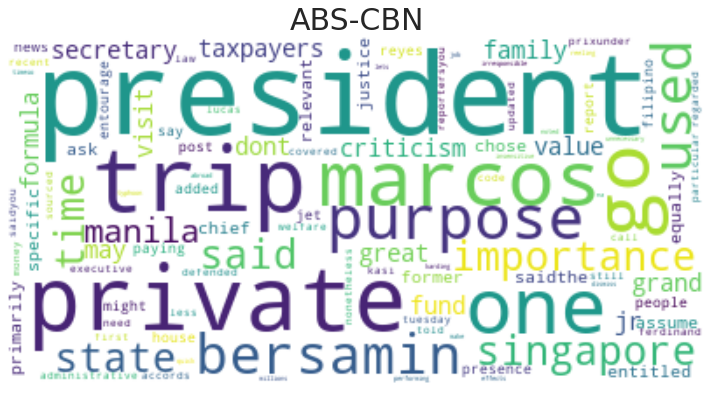

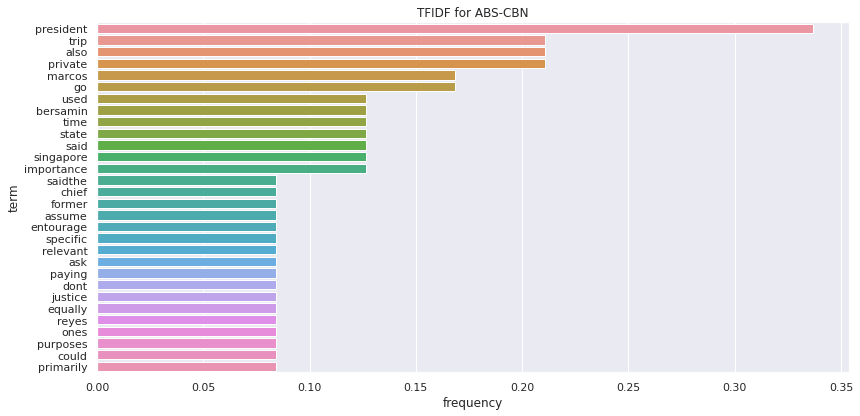

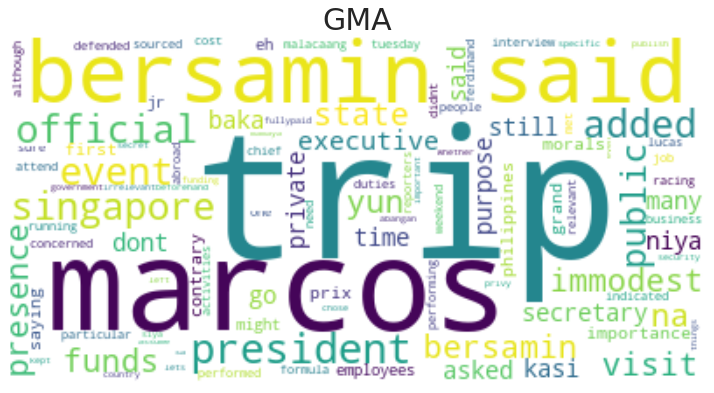

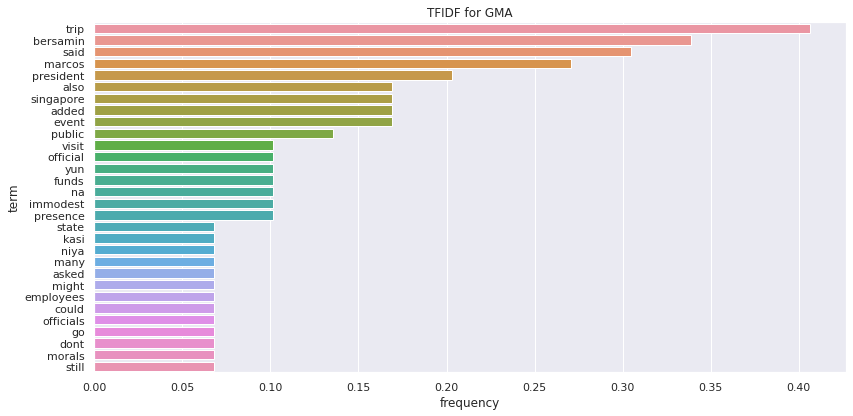

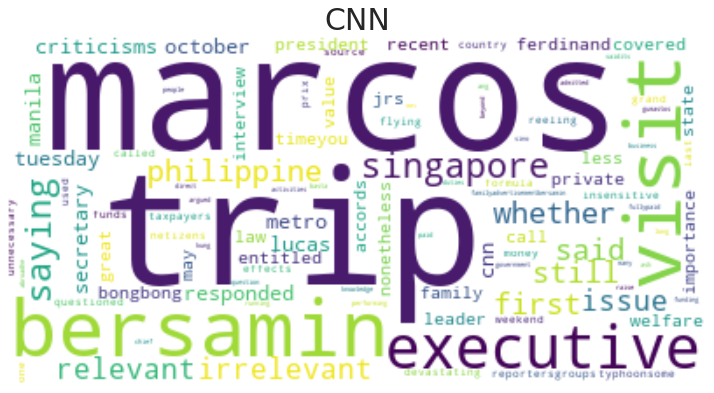

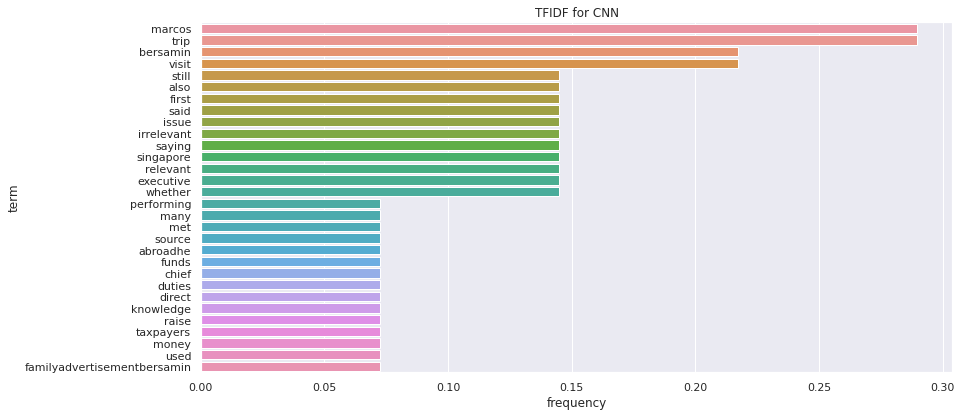

In [50]:
visualize((clean(abscbn,"Text", "cleanText")), "cleanText", "ABS-CBN")
visualize((clean(gma,"Text", "cleanText")), "cleanText", "GMA")
visualize((clean(cnn,"Text", "cleanText")), "cleanText", "CNN")

### Sentimental Analysis

In [ ]:
df_clean= clean(df_, 'Text', 'clean_Textbody')
df_clean= clean(df_, 'Title', 'clean_Title')
df_clean["clean_Body_Title"] = df_clean["clean_Title"].str.cat(df_clean["clean_Textbody"], sep = "\n")
df_clean.head()

,Title,Author,Date,Text,clean_Textbody,clean_Title,clean_Body_Title
0,"OVP eyes Coconut Palace as permanent home, see...","Jauhn Etienne Villaruel, ABS-CBN News",Sep 29 2022,MANILA — Vice President Sara Duterte on Thursd...,MANILA — Vice President Sara Duterte Thursday ...,"OVP eyes Coconut Palace permanent home, seeks ...","OVP eyes Coconut Palace permanent home, seeks ..."
1,Sara Duterte: OVP in talks with GSIS for possi...,"By HANA BORDEY, GMA News",2022-09-29,Vice President Sara Duterte on Thursday discl...,Vice President Sara Duterte Thursday disclosed...,Sara Duterte: OVP talks GSIS possible acquisit...,Sara Duterte: OVP talks GSIS possible acquisit...


### POS

In [ ]:
def POS(df, dfCol, colLabel):
  POS = []
  for index, row in df.iterrows():
    # print(type(row[dfCol]), row[dfCol])
    tokenized = sent_tokenize(row[dfCol])
    for i in tokenized:
      
      # Word tokenizers is used to find the words
      # and punctuation in a string
      wordsList = nltk.word_tokenize(i)

      wordsList = [w for w in wordsList if not w in stopwords]
  
      #  Using a Tagger. Which is part-of-speech
      # tagger or POS-tagger.
      tagged = nltk.pos_tag(wordsList)
      POS.append(tagged)
    df.loc[index, colLabel] =  POS
    
 

In [ ]:
# https://www.geeksforgeeks.org/part-speech-tagging-stop-words-using-nltk-python/
POS(df_clean, 'clean_Body_Title', "POS")
df_clean


,Title,Author,Date,Text,clean_Textbody,clean_Title,clean_Body_Title,POS
0,"OVP eyes Coconut Palace as permanent home, see...","Jauhn Etienne Villaruel, ABS-CBN News",Sep 29 2022,MANILA — Vice President Sara Duterte on Thursd...,MANILA — Vice President Sara Duterte Thursday ...,"OVP eyes Coconut Palace permanent home, seeks ...","OVP eyes Coconut Palace permanent home, seeks ...","[[(OVP, NNP), (eyes, NNS), (Coconut, NNP), (Pa..."
1,Sara Duterte: OVP in talks with GSIS for possi...,"By HANA BORDEY, GMA News",2022-09-29,Vice President Sara Duterte on Thursday discl...,Vice President Sara Duterte Thursday disclosed...,Sara Duterte: OVP talks GSIS possible acquisit...,Sara Duterte: OVP talks GSIS possible acquisit...,"[[(OVP, NNP), (eyes, NNS), (Coconut, NNP), (Pa..."


In [ ]:
df_clean.to_csv(f"{dir}textCompare.csv")